In [89]:
from pathlib import Path

import networkx as nx
import numpy as np

In [90]:
input_data = Path("example.txt").read_text()
NUM_CONNECTIONS = 10  # Example: 10, Input: 1000

coordinates = np.array(
    [line.split(",") for line in input_data.splitlines()],
    dtype=int,
)
print(coordinates)

[[162 817 812]
 [ 57 618  57]
 [906 360 560]
 [592 479 940]
 [352 342 300]
 [466 668 158]
 [542  29 236]
 [431 825 988]
 [739 650 466]
 [ 52 470 668]
 [216 146 977]
 [819 987  18]
 [117 168 530]
 [805  96 715]
 [346 949 466]
 [970 615  88]
 [941 993 340]
 [862  61  35]
 [984  92 344]
 [425 690 689]]


In [91]:
def compute_distances(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum(np.power(x - y, 2), axis=1))


def build_adjacency(coordinates: np.ndarray) -> np.ndarray:
    num_observations = coordinates.shape[0]
    adjacency = np.zeros((num_observations, num_observations), dtype=float)
    for i in range(num_observations):
        adjacency[i] = compute_distances(coordinates, coordinates[i])
    np.fill_diagonal(adjacency, np.inf)
    return adjacency


adjacency = build_adjacency(coordinates)
print(adjacency.round(0))

[[  inf  788.  909.  562.  724.  736. 1047.  322.  693.  391.  693. 1045.
   709.  971.  414. 1104.  928. 1290. 1192.  317.]
 [ 788.   inf 1020. 1042.  471.  424.  784. 1024.  796.  629. 1046.  848.
   656. 1125.  600.  914. 1001.  979. 1104.  735.]
 [ 909. 1020.   inf  507.  612.  671.  589.  791.  348.  868.  834.  833.
   813.  322.  818.  540.  671.  606.  353.  597.]
 [ 562. 1042.  507.   inf  697.  814.  837.  385.  525.  605.  504. 1077.
   700.  493.  711.  942.  864. 1033.  812.  368.]
 [ 724.  471.  612.  697.   inf  373.  372.  844.  522.  492.  718.  845.
   372.  662.  629.  708.  879.  640.  681.  527.]
 [ 736.  424.  671.  814.  373.   inf  648.  845.  412.  686. 1003.  496.
   714.  867.  434.  512.  604.  735.  797.  533.]
 [1047.  784.  589.  837.  372.  648.   inf 1101.  691.  788.  818. 1021.
   535.  551.  968.  741. 1048.  379.  459.  810.]
 [ 322. 1024.  791.  385.  844.  845. 1101.   inf  631.  610.  712. 1057.
   860.  864.  543. 1070.  842. 1295. 1122.  328.]


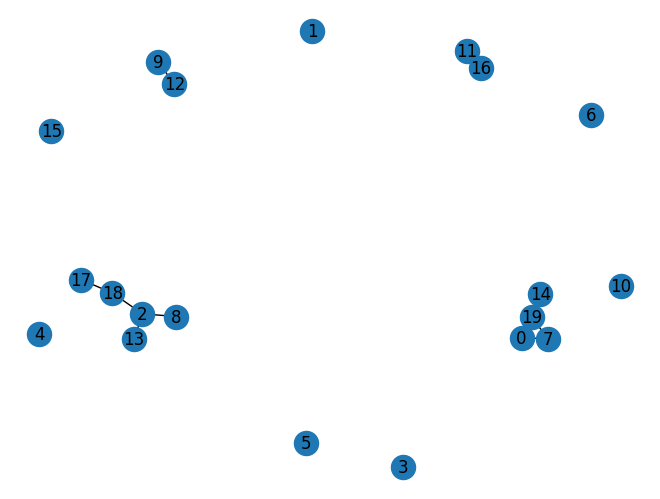

In [92]:
connections = []
for _ in range(NUM_CONNECTIONS):
    min_index = adjacency.argmin()
    node_1, node_2 = np.unravel_index(min_index, adjacency.shape)
    connections.append((node_1, node_2))
    adjacency[node_1, node_2] = np.inf
    adjacency[node_2, node_1] = np.inf

G = nx.Graph()
G.add_nodes_from(range(coordinates.shape[0]))
G.add_edges_from(connections)

nx.draw(G, with_labels=True)

In [95]:
sizes = np.array([len(component) for component in nx.connected_components(G)])
sizes.partition(-3)
result = sizes[-3:].prod()
print(result)

40


In [96]:
adjacency = build_adjacency(coordinates)
i = 0
while True:
    min_index = adjacency.argmin()
    node_1, node_2 = np.unravel_index(min_index, adjacency.shape)
    adjacency[node_1, node_2] = np.inf
    adjacency[node_2, node_1] = np.inf
    if np.all(np.sum(adjacency == np.inf, axis=1) > 1):
        break
    i += 1

print(coordinates[node_1, 0] * coordinates[node_2, 0])

25272
